# PREDICTING CAR PRICES

The goal of this project is to use K Nearest to predict the market price of cars based on a number of it's attributes.
You can find the data set we will be working with here : <br>
[https://archive.ics.uci.edu/ml/datasets/automobile](https://archive.ics.uci.edu/ml/datasets/automobile)


In [1]:
### Importing the librairies we will be working with
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error


### Reading the data set
cars = pd.read_csv("imports-85.data")

In [2]:
### Displaying the first 10 rows
cars.head()

,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.60,...,130,mpfi,3.47,2.68,9.00,111,5000,21,27,13495
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
1,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
2,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
3,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
4,2,?,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250


We notice that the columns are not named, we can get their names in the dataset documentation and rename them.  

In [3]:
column_names = ["symboling", "normalized_losses", "make", "fuel_type","aspiration","num_doors", "body_style", "drive_wheels", "engine_location", "wheel_base", "length", "width", "height", "curb_weight", "engine_type", "num_cylinders", "engine_size", "fuel_system", "bore", "stroke", "compression_ratio", "horsepower","peak_rpm","city_mpg","highway_mpg","price"]

In [4]:
### Naming the columns 
cars.columns = column_names 

In [5]:
### Displaying the changes
cars.head(10)

,symboling,normalized_losses,make,fuel_type,aspiration,num_doors,body_style,drive_wheels,engine_location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
1,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
2,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
3,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
4,2,?,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250
5,1,158,audi,gas,std,four,sedan,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,17710
6,1,?,audi,gas,std,four,wagon,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,18920
7,1,158,audi,gas,turbo,four,sedan,fwd,front,105.8,...,131,mpfi,3.13,3.40,8.3,140,5500,17,20,23875
8,0,?,audi,gas,turbo,two,hatchback,4wd,front,99.5,...,131,mpfi,3.13,3.40,7.0,160,5500,16,22,?
9,2,192,bmw,gas,std,two,sedan,rwd,front,101.2,...,108,mpfi,3.50,2.80,8.8,101,5800,23,29,16430


### Choice of target and features
- Target :<br>
Since we want to predict the price, our target column will be the price column.  


- Possible features : <br>
we have the possibility to use the following columns because they have numeric values : 
["symboling","normalized_losses", "wheel_base", "lenght", "width", "height","curb_weight", "engine_size", "bore","stroke", "compression_ratio", "horsepower","peak_rpm","city_mpg","highway_mpg"]

In [6]:
numeric_columns = ["symboling","normalized_losses", "wheel_base", "length", "width", "height","curb_weight", "engine_size", "bore","stroke", "compression_ratio", "horsepower","peak_rpm","city_mpg","highway_mpg"]

## DATA CLEANING

In [7]:
### remplacing "?" with NaN values in the [normalized_losses column]
cars.replace("?", np.nan, inplace = True)

In [8]:
### Displaying the changes
cars.head(10)

,symboling,normalized_losses,make,fuel_type,aspiration,num_doors,body_style,drive_wheels,engine_location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
1,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
2,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
3,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
4,2,NaN,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250
5,1,158,audi,gas,std,four,sedan,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,17710
6,1,NaN,audi,gas,std,four,wagon,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,18920
7,1,158,audi,gas,turbo,four,sedan,fwd,front,105.8,...,131,mpfi,3.13,3.40,8.3,140,5500,17,20,23875
8,0,NaN,audi,gas,turbo,two,hatchback,4wd,front,99.5,...,131,mpfi,3.13,3.40,7.0,160,5500,16,22,NaN
9,2,192,bmw,gas,std,two,sedan,rwd,front,101.2,...,108,mpfi,3.50,2.80,8.8,101,5800,23,29,16430


In [9]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204 entries, 0 to 203
Data columns (total 26 columns):
symboling            204 non-null int64
normalized_losses    164 non-null object
make                 204 non-null object
fuel_type            204 non-null object
aspiration           204 non-null object
num_doors            202 non-null object
body_style           204 non-null object
drive_wheels         204 non-null object
engine_location      204 non-null object
wheel_base           204 non-null float64
length               204 non-null float64
width                204 non-null float64
height               204 non-null float64
curb_weight          204 non-null int64
engine_type          204 non-null object
num_cylinders        204 non-null object
engine_size          204 non-null int64
fuel_system          204 non-null object
bore                 200 non-null object
stroke               200 non-null object
compression_ratio    204 non-null float64
horsepower           202 non-nul

In [10]:
cars[numeric_columns].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204 entries, 0 to 203
Data columns (total 15 columns):
symboling            204 non-null int64
normalized_losses    164 non-null object
wheel_base           204 non-null float64
length               204 non-null float64
width                204 non-null float64
height               204 non-null float64
curb_weight          204 non-null int64
engine_size          204 non-null int64
bore                 200 non-null object
stroke               200 non-null object
compression_ratio    204 non-null float64
horsepower           202 non-null object
peak_rpm             202 non-null object
city_mpg             204 non-null int64
highway_mpg          204 non-null int64
dtypes: float64(5), int64(5), object(5)
memory usage: 24.0+ KB


We can notice that some columns that should be numeric(float or int) are identifies as object. we have to convert them into int or float type in order to perform some calculations on them.<br> To make things simpler, we will convert all the possible features in float type.

In [11]:
### convertic numerical columns into float type
cars[numeric_columns] = cars[numeric_columns].astype(float)

In [12]:
### Displaying the changes
cars[numeric_columns].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204 entries, 0 to 203
Data columns (total 15 columns):
symboling            204 non-null float64
normalized_losses    164 non-null float64
wheel_base           204 non-null float64
length               204 non-null float64
width                204 non-null float64
height               204 non-null float64
curb_weight          204 non-null float64
engine_size          204 non-null float64
bore                 200 non-null float64
stroke               200 non-null float64
compression_ratio    204 non-null float64
horsepower           202 non-null float64
peak_rpm             202 non-null float64
city_mpg             204 non-null float64
highway_mpg          204 non-null float64
dtypes: float64(15)
memory usage: 24.0 KB


Now, all the columns in the numeric_columns list have been converted to float type. <br> We can notice that there is some null values. Lets investigate further and see how wa can deal with them.

### Missing values

In [13]:
### Counting the number of missing values in our numeric 
cars[numeric_columns].isnull().sum()

symboling             0
normalized_losses    40
wheel_base            0
length                0
width                 0
height                0
curb_weight           0
engine_size           0
bore                  4
stroke                4
compression_ratio     0
horsepower            2
peak_rpm              2
city_mpg              0
highway_mpg           0
dtype: int64

In [14]:
### Calculating the percentage of null values in each column
((cars[numeric_columns].isnull().sum())/len(cars))*100 

symboling             0.000000
normalized_losses    19.607843
wheel_base            0.000000
length                0.000000
width                 0.000000
height                0.000000
curb_weight           0.000000
engine_size           0.000000
bore                  1.960784
stroke                1.960784
compression_ratio     0.000000
horsepower            0.980392
peak_rpm              0.980392
city_mpg              0.000000
highway_mpg           0.000000
dtype: float64

For the nformation above, we take note that :
- normalized_losses has 19.60 % of null values
- bore has 1.96 % of null values
- stroke has 1.96 % of null values
- horsepower has 0.98 % of null values
- peak_rpm has 0.98 % of null values

normalized_losses has too much null values, 19.6 % is a lot!
We have several options : 
- Replace the missing values using the average values from that column.
- Drop the rows entirely (especially if other columns in those rows have missing values).
- Drop the column entirely.
    

normalized_losses is an interesting information to have as feature in our prediction. Droping its values is not a good idea. Instead, we will replace the missing values with the average value of the column. 

In [15]:
cars["normalized_losses"].replace(np.nan, cars["normalized_losses"].mean(), inplace = True)

In [16]:
### Displaying the changes
cars["normalized_losses"]

0      122.0
1      122.0
2      164.0
3      164.0
4      122.0
5      158.0
6      122.0
7      158.0
8      122.0
9      192.0
10     192.0
11     188.0
12     188.0
13     122.0
14     122.0
15     122.0
16     122.0
17     121.0
18      98.0
19      81.0
20     118.0
21     118.0
22     118.0
23     148.0
24     148.0
25     148.0
26     148.0
27     110.0
28     145.0
29     137.0
       ...  
174     65.0
175     65.0
176     65.0
177    197.0
178    197.0
179     90.0
180    122.0
181    122.0
182    122.0
183     94.0
184     94.0
185     94.0
186     94.0
187     94.0
188    122.0
189    256.0
190    122.0
191    122.0
192    122.0
193    103.0
194     74.0
195    103.0
196     74.0
197    103.0
198     74.0
199     95.0
200     95.0
201     95.0
202     95.0
203     95.0
Name: normalized_losses, Length: 204, dtype: float64

Lets do the same for ["bore" , "stroke" , "horsepower" , "peak_rpm"] : 

In [17]:
cars[["bore" , "stroke" , "horsepower" , "peak_rpm"]] = cars[["bore" , "stroke" , "horsepower" , "peak_rpm"]].fillna(cars[["bore" , "stroke" , "horsepower" , "peak_rpm"]].mean())

In [18]:
### Checking the changes 
cars[numeric_columns].isnull().sum()

symboling            0
normalized_losses    0
wheel_base           0
length               0
width                0
height               0
curb_weight          0
engine_size          0
bore                 0
stroke               0
compression_ratio    0
horsepower           0
peak_rpm             0
city_mpg             0
highway_mpg          0
dtype: int64

Lets check our target column and see if there is any missing values : 

In [19]:
cars["price"].isnull().sum()

4

Because price is the column we want to predict, let's remove any rows with missing price values.

In [20]:
cars.dropna(subset = ["price"], inplace = True)

In [21]:
### Checking the changes
cars["price"].isnull().sum()

0

In [22]:
### convertic "price" column into float type
cars["price"] = cars["price"].astype(float)

Now all the numeric columns are cleaned.<br>
But if we look closer, there is some columns that contains string but can be easily converted in numeric values. <br>
For example the ["num_doors"] column has values like "two" and "four" that we  can convert into 2 and 4.

In [23]:
### Checking the unique values in "num_doors" column
cars["num_doors"].value_counts()

four    113
two      85
Name: num_doors, dtype: int64

In [24]:
cars["num_doors"].replace(["four","two"], [4,2], inplace = True)

In [25]:
### Checking the changes
cars["num_doors"].value_counts()

4.0    113
2.0     85
Name: num_doors, dtype: int64

In [26]:
### Checking null values
cars["num_doors"].isnull().sum()

2

In [27]:
### Replacing the null values by the mean 
cars["num_doors"] = cars["num_doors"].fillna(cars["num_doors"].mean())

In [28]:
### Checking the changes
cars["num_doors"].isnull().sum()

0

Lets add that column into our possible features, the numeric columns list

In [29]:
numeric_columns.append("num_doors")

In [30]:
### Checking the changes 
numeric_columns

['symboling',
 'normalized_losses',
 'wheel_base',
 'length',
 'width',
 'height',
 'curb_weight',
 'engine_size',
 'bore',
 'stroke',
 'compression_ratio',
 'horsepower',
 'peak_rpm',
 'city_mpg',
 'highway_mpg',
 'num_doors']

# Features normalization

Lets normalize the numeric features so that individual values do not over affect the rrsults. All values will range from 0 to 1 (in absolute). 

In [31]:
cars[numeric_columns] = (cars[numeric_columns] - cars[numeric_columns].mean())/(cars[numeric_columns].std())

In [32]:
cars[numeric_columns]

,symboling,normalized_losses,wheel_base,length,width,height,curb_weight,engine_size,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,num_doors
0,1.738006,0.000000,-1.697177,-0.439616,-0.855008,-2.055427,-0.014857,0.075389,0.521365,-1.845509,-0.291493,0.203782,-0.246765,-0.652936,-0.542680,-1.155909
1,0.136157,0.000000,-0.720075,-0.245239,-0.189262,-0.572999,0.515422,0.603594,-2.420225,0.668999,-0.291493,1.351809,-0.246765,-0.963857,-0.689152,-1.155909
2,0.937082,1.309368,0.157661,0.192109,0.143611,0.209393,-0.421726,-0.428806,-0.521224,0.446195,-0.042375,-0.036503,0.796552,-0.186553,-0.103263,0.869489
3,0.937082,1.309368,0.091417,0.192109,0.238717,0.209393,0.517350,0.219445,-0.521224,0.446195,-0.540611,0.310575,0.796552,-1.119318,-1.275042,0.869489
4,0.937082,0.000000,0.157661,0.248803,0.191164,-0.284750,-0.093917,0.219445,-0.521224,0.446195,-0.416052,0.177084,0.796552,-0.963857,-0.835625,-1.155909
5,0.136157,1.122316,1.151325,1.496056,2.616381,0.785893,0.555916,0.219445,-0.521224,0.446195,-0.416052,0.177084,0.796552,-0.963857,-0.835625,0.869489
6,0.136157,0.000000,1.151325,1.496056,2.616381,0.785893,0.768028,0.219445,-0.521224,0.446195,-0.416052,0.177084,0.796552,-0.963857,-0.835625,0.869489
7,0.136157,1.122316,1.151325,1.496056,2.616381,0.868250,1.022562,0.099399,-0.744636,0.446195,-0.465875,0.978033,0.796552,-1.274779,-1.567987,0.869489
9,0.937082,2.182280,0.389516,0.208307,-0.522135,0.209393,-0.309886,-0.452816,0.633071,-1.463558,-0.341316,-0.063201,1.422542,-0.342014,-0.249735,-1.155909
10,-0.664767,2.182280,0.389516,0.208307,-0.522135,0.209393,-0.309886,-0.452816,0.633071,-1.463558,-0.341316,-0.063201,1.422542,-0.342014,-0.249735,0.869489


# Univariate k-nearest neighbors model

In [33]:
def knn_train_test(train_col_name, target_col_name, df) : 
    knn = KNeighborsRegressor()
    np.random.seed(1)
    
    ### Randomized the order of rows to avoid bias due to the initial ordering
    shuffled_index = np.random.permutation(df.index)
    randomized_df = df.reindex(shuffled_index)
    
    ### Dividing the dataset into two part : train set and test set
    train_df = randomized_df.iloc[0:(int(len(randomized_df)/2))]
    test_df = randomized_df.iloc[(int(len(randomized_df)/2)):]
    
    ### Fitting a K-nearest neighbors model
    knn.fit(train_df[[train_col_name]], train_df[target_col_name])
    
    ### Making prediction with the model
    predicted_labels = knn.predict(test_df[[train_col_name]])
    
    ### Calculating the RMSE
    mse = mean_squared_error(test_df[target_col_name], predicted_labels)
    rmse = np.sqrt(mse)
    
    ### Returning the RMSE
    return rmse

Lets use the function to return the RMSE value for each column in the numeric_columns list. 

In [34]:
### Adding the price column to the numeric_columns list
numeric_columns.append("price") 
### Creating a data set with only numeric values
numeric_cars = cars[numeric_columns]

In [35]:
rmses_result = {}
train_cols = numeric_cars.columns.drop('price')
### Calculating the rmse for each numeric column and storing the results into a dictionnary
for column in train_cols :
    rmse_column = knn_train_test(train_col_name = column, target_col_name = 'price', df = numeric_cars)
    rmses_result[column] = rmse_column
### Creating a series object to easlily sort by values
rmses_series = pd.Series(rmses_result)
### Sorting and displaying the results 
rmses_series.sort_values()

engine_size          3295.589428
curb_weight          3425.134716
width                3779.239622
highway_mpg          3789.994141
city_mpg             3926.524606
horsepower           4461.960680
length               5127.089153
wheel_base           5443.857347
bore                 6225.466251
peak_rpm             6553.369323
compression_ratio    7001.541388
symboling            7082.165048
height               7267.324352
num_doors            7762.740334
stroke               8186.919087
normalized_losses    8198.617866
dtype: float64

We can notice that the column that performed the best with the default k-value(5) is "engine_size"

Lets modify the funtion to accept a parameter for the k value

In [36]:
def knn_train_test(train_col_name, target_col_name, df, k_value) : 
    np.random.seed(1)
    
    ### Randomized the order of rows to avoid bias due to the initial ordering
    shuffled_index = np.random.permutation(df.index)
    randomized_df = df.reindex(shuffled_index)
    
    ### Dividing the dataset into two part : train set and test set
    train_df = randomized_df.iloc[0:(int(len(randomized_df)/2))]
    test_df = randomized_df.iloc[(int(len(randomized_df)/2)):]
    
    rmses_k = {}
    for k in range (1,k_value):
        ### Fitting a K-nearest neighbors model
        knn = KNeighborsRegressor(n_neighbors = k)
        knn.fit(train_df[[train_col_name]], train_df[target_col_name])

        ### Making prediction with the model
        predicted_labels = knn.predict(test_df[[train_col_name]])

        ### Calculating the RMSE
        mse = mean_squared_error(test_df[target_col_name], predicted_labels)
        rmse = np.sqrt(mse)
        
        ### Storing the RMSE values into the rmses_k dictionnary
        rmses_k[k] = rmse

        ### Returning the RMSE
    return rmses_k

In [37]:
rmses_results_k = {}
train_cols = numeric_cars.columns.drop('price')
### Calculating the rmse for each numeric column and storing the results into a dictionnary
for column in train_cols :
    rmse_column = knn_train_test(train_col_name = column, target_col_name = 'price', df = numeric_cars, k_value = 10)
    rmses_results_k[column] = rmse_column

### Displaying the results 
rmses_results_k

{'bore': {1: 5907.657268325575,
  2: 6337.849395102411,
  3: 5905.129465793089,
  4: 5994.279873919385,
  5: 6225.466250715684,
  6: 6402.48398260394,
  7: 6289.529015493505,
  8: 6614.406699548437,
  9: 6509.798959612186},
 'city_mpg': {1: 4142.162823936307,
  2: 3208.2271872484343,
  3: 3521.805549714521,
  4: 4010.826114483773,
  5: 3926.524606009747,
  6: 3862.6349576566395,
  7: 3700.3759582021958,
  8: 3953.6564429928344,
  9: 3874.8990304009817},
 'compression_ratio': {1: 7344.202947903877,
  2: 6687.125359038815,
  3: 5943.417906577177,
  4: 6497.1039866331985,
  5: 7001.541387894526,
  6: 7083.472834567488,
  7: 7340.459359242708,
  8: 7247.465966632752,
  9: 7196.820045283717},
 'curb_weight': {1: 4390.877922466076,
  2: 4703.692137034481,
  3: 3689.295868680996,
  4: 3700.7204626261628,
  5: 3425.134715890749,
  6: 3377.8916664919193,
  7: 3174.0695108639184,
  8: 3224.707139052514,
  9: 3373.828245571681},
 'engine_size': {1: 3384.31809970635,
  2: 3066.883875369265,
  3: 3

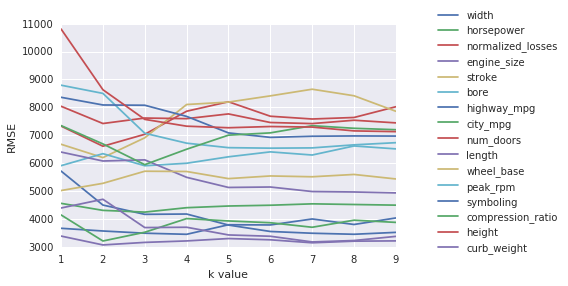

In [38]:
### Lets visualize the results with the help of matplotlib libraty
%matplotlib inline 

for k, v in rmses_results_k.items():
    x = list(v.keys())
    y = list(v.values())
    
    
    plt.plot(x,y,label = k)
    plt.xlabel('k value')
    plt.ylabel('RMSE')
    plt.legend(loc="upper left", bbox_to_anchor=(1.1,1.1))

# Multivariate k-nearest neighbors model

In [39]:
### Calculating the average RMSE for each feature with different "k" values
feature_avg_rmse = {}
for k,v in rmses_results_k.items():
    avg_rmse = np.mean(list(v.values()))
    feature_avg_rmse[k] = avg_rmse
series_avg_rmse = pd.Series(feature_avg_rmse)
sorted_series_avg_rmse = series_avg_rmse.sort_values()
print(sorted_series_avg_rmse)

sorted_features = sorted_series_avg_rmse.index

engine_size          3213.741204
curb_weight          3673.357519
highway_mpg          3729.914743
city_mpg             3800.123630
width                4036.493821
horsepower           4445.373531
wheel_base           5468.555430
length               5469.380147
bore                 6242.955657
compression_ratio    6926.845533
peak_rpm             7121.608620
symboling            7455.429105
normalized_losses    7548.560744
num_doors            7586.138340
stroke               7710.452156
height               7830.734877
dtype: float64


In [40]:
def knn_train_test(train_cols, target_col, df):
    np.random.seed(1)
    
    ### Randomized the order of rows to avoid bias due to the initial ordering
    shuffled_index = np.random.permutation(df.index)
    randomized_df = df.reindex(shuffled_index)

    ### Dividing the dataset into two part : train set and test set
    train_df = randomized_df.iloc[0:(int(len(randomized_df)/2))]
    test_df = randomized_df.iloc[(int(len(randomized_df)/2)):]
    
    
    k_values = [5]
    rmses_k = {} 
    for k in k_values:
        ### Fitting a K-nearest neighbors model
        knn = KNeighborsRegressor(n_neighbors=k)
        knn.fit(train_df[train_cols], train_df[target_col])

        ### Making predictions with the model
        predicted_labels = knn.predict(test_df[train_cols])

        ### Calculating the RMSE
        mse = mean_squared_error(test_df[target_col], predicted_labels)
        rmse = np.sqrt(mse)
        
         ### Storing the RMSE values into the rmses_k dictionnary
        rmses_k[k] = rmse
        
        ### Returning the RMSE
    return rmses_k

In [41]:
rmse_results_k = {}

for nr_best_feats in range(2,7):
    rmse_results_k['{} best features'.format(nr_best_feats)] = knn_train_test(
        sorted_features[:nr_best_feats],
        'price',
        numeric_cars
    )

rmse_results_k

{'2 best features': {5: 2811.8769505083255},
 '3 best features': {5: 3147.1754282848615},
 '4 best features': {5: 3106.8919748842254},
 '5 best features': {5: 2898.70817848227},
 '6 best features': {5: 2776.422198153588}}

# Hyperparameter Tuning

In [42]:
def knn_train_test(train_cols, target_col, df):
    np.random.seed(1)
    
    ### Randomized the order of rows to avoid bias due to the initial ordering
    shuffled_index = np.random.permutation(df.index)
    randomized_df = df.reindex(shuffled_index)

    ### Dividing the dataset into two part : train set and test set
    train_df = randomized_df.iloc[0:(int(len(randomized_df)/2))]
    test_df = randomized_df.iloc[(int(len(randomized_df)/2)):]
    
    k_values = [i for i in range(1, 25)]
    rmses_k = {} 
    for k in k_values:
        ### Fitting a K-nearest neighbors model
        knn = KNeighborsRegressor(n_neighbors=k)
        knn.fit(train_df[train_cols], train_df[target_col])

        ### Making predictions with the model
        predicted_labels = knn.predict(test_df[train_cols])

        ### Calculating the RMSE
        mse = mean_squared_error(test_df[target_col], predicted_labels)
        rmse = np.sqrt(mse)
        
         ### Storing the RMSE values into the rmses_k dictionnary
        rmses_k[k] = rmse
        
        ### Returning the RMSE
    return rmses_k

In [43]:
rmses_results_k = {}

for nr_best_feats in range(2,6):
    rmses_results_k['{} best features'.format(nr_best_feats)] = knn_train_test(
        sorted_features[:nr_best_feats],
        'price',
        numeric_cars
    )

rmses_results_k
    

{'2 best features': {1: 3412.9139060339626,
  2: 2820.9806012271692,
  3: 2809.9668582466315,
  4: 2748.766999492682,
  5: 2811.8769505083255,
  6: 2893.859326180563,
  7: 3003.0511846712006,
  8: 3184.035965808568,
  9: 3319.8690758619077,
  10: 3327.218870378082,
  11: 3455.6664130714,
  12: 3578.8935610006934,
  13: 3588.069223257485,
  14: 3648.1776139335816,
  15: 3660.014100616432,
  16: 3660.17405267282,
  17: 3688.6854287702745,
  18: 3633.1371765984118,
  19: 3621.5654693222464,
  20: 3646.042561370479,
  21: 3707.5068442925617,
  22: 3737.2229822240515,
  23: 3749.809411131579,
  24: 3782.428610777076},
 '3 best features': {1: 2684.2619209011627,
  2: 2556.3102653042724,
  3: 2682.554504572088,
  4: 2984.8284896288433,
  5: 3147.1754282848615,
  6: 2991.5822655689526,
  7: 3157.5777508161186,
  8: 3236.7096092859106,
  9: 3397.528773904082,
  10: 3495.985047436559,
  11: 3495.9782489820177,
  12: 3643.091532127395,
  13: 3597.7497441838764,
  14: 3646.5046233499065,
  15: 364

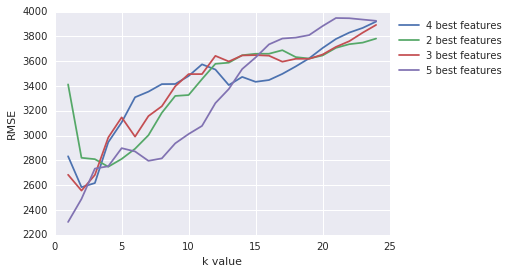

In [44]:
### Lets visualize the results
for k, v in rmses_results_k.items():
    x = list(v.keys())
    y = list(v.values())
    plt.plot(x,y, label="{}".format(k))
    
    
plt.xlabel('k value')
plt.ylabel('RMSE')
plt.legend(loc="upper left", bbox_to_anchor=(1,1))